# Bar Chart Race in Python with Matplotlib

~In roughly less than 50 lines of code.

![gif](https://pratapvardhan.com/img/b/bar-chart-race-2.gif)

How easy would it be to re-create bar chart race in Python using Jupyter and Matplotlib?

Turns out, in less than 50 lines of code, you can reasonably re-create reusable bar chart race in Python with Matplotlib.

### import the dependent libraries

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

### Data

Read the [city populations dataset](https://gist.githubusercontent.com/johnburnmurdoch/4199dbe55095c3e13de8d5b2e5e5307a/raw/fa018b25c24b7b5f47fd0568937ff6c04e384786/city_populations) with `pandas`.

We only need 4 columns to work with `'name', 'group', 'year', 'value'`.
Typically, a `name` is mapped to a `group` and each `year` has one `value`.

In [282]:
df = pd.read_csv("owid-covid-data.csv")
df.drop(df[df['population'] < 1000000].index, inplace=True)
df = df[['location','continent','date','total_deaths_per_million']]
df['total_deaths_per_million'] = df['total_deaths_per_million'].fillna(0).astype(np.int64)

In [283]:
#df['date'] =  pd.to_datetime(df['date'], infer_datetime_format=True)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46420 entries, 0 to 55122
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   location                  46420 non-null  object
 1   continent                 45770 non-null  object
 2   date                      46420 non-null  object
 3   total_deaths_per_million  46420 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


### Color, Labels

We'll user `colors` and `group_lk` to add color to the bars.

In [285]:
colors = dict(zip(
    ["India", "Europe", "Asia", "Latin America", "Middle East", "North America", "Africa", "South America"],
    ["#adb0ff", "#f7bb5f", "#adb0ff", "#e48381", "#ffb3ff", "#aafbff", "#eafb50", "#90d595"]
))
group_lk = df.set_index('location')['continent'].to_dict()

In [286]:
colors

{'India': '#adb0ff',
 'Europe': '#f7bb5f',
 'Asia': '#adb0ff',
 'Latin America': '#e48381',
 'Middle East': '#ffb3ff',
 'North America': '#aafbff',
 'Africa': '#eafb50',
 'South America': '#90d595'}

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46420 entries, 0 to 55122
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   location                  46420 non-null  object
 1   continent                 45770 non-null  object
 2   date                      46420 non-null  object
 3   total_deaths_per_million  46420 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [327]:
import locale
locale.setlocale(locale.LC_TIME, "pt_BR") # portugues

'pt_BR'

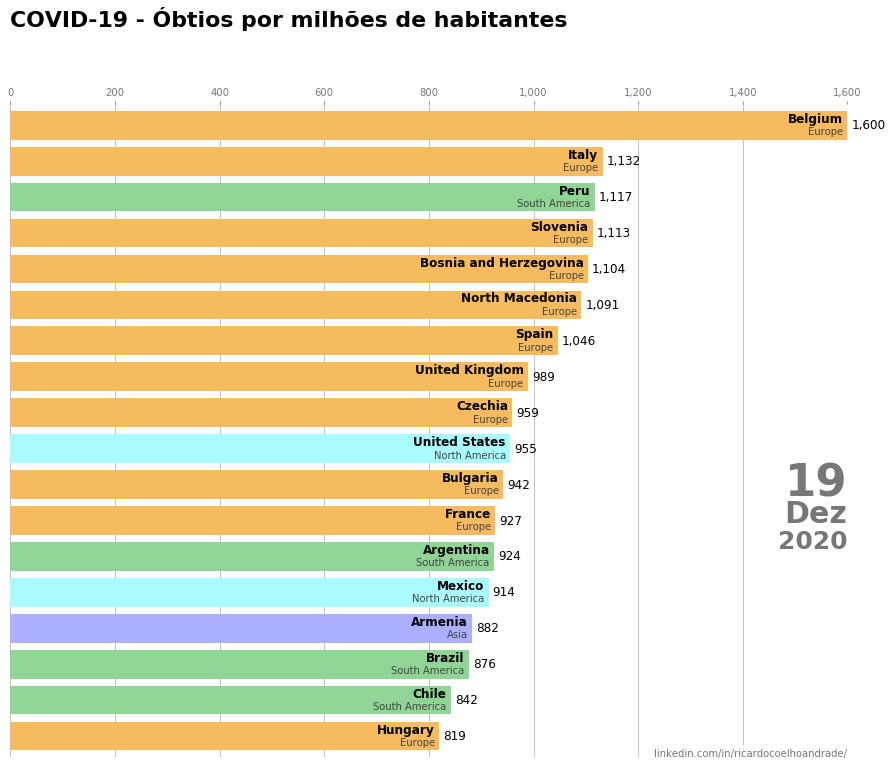

In [331]:
fig, ax = plt.subplots(figsize=(15, 12))

def draw_barchart(current_date):
    dff = df[df['date'].eq(current_date)].sort_values(by='total_deaths_per_million', ascending=True).tail(18)
    ax.clear()
    ax.barh(dff['location'], dff['total_deaths_per_million'], color=[colors[group_lk[x]] for x in dff['location']])
    dx = dff['total_deaths_per_million'].max() / 200

    for i, (value, name) in enumerate(zip(dff['total_deaths_per_million'], dff['location'])):
        ax.text(value-dx, i,     name,           size=12, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.26, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=12, ha='left',  va='center')
    ax.text(1, 0.4, pd.to_datetime(current_date, format='%Y/%m/%d').day, transform=ax.transAxes, color='#777777', size=45, ha='right', weight=600)
    ax.text(1, 0.36, pd.to_datetime(current_date, format='%Y/%m/%d').strftime("%b").capitalize(), transform=ax.transAxes, color='#777777', size=30, ha='right', weight=600)
    ax.text(1, 0.32, pd.to_datetime(current_date, format='%Y/%m/%d').year, transform=ax.transAxes, color='#777777', size=25, ha='right', weight=600)
    #ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=10)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'COVID-19 - Óbtios por milhões de habitantes',
            transform=ax.transAxes, size=22, weight=600, ha='left', va='top')
    ax.text(1, 0, 'linkedin.com/in/ricardocoelhoandrade/', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart('2020-12-19')

## Animate

To animate, we will use [`FuncAnimation`][FuncAnimation] from `matplotlib.animation`.

[`FuncAnimation`][FuncAnimation] makes an animation by repeatedly calling a function (that draws on canvas). 
In our case, it'll be `draw_barchart`.

`frames` arguments accepts on what values you want to run `draw_barchart` -- we'll
run from `year` 1900 to 2018.

Run below cell.

[FuncAnimation]: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.animation.FuncAnimation.html

Animation size has reached 20983373 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.


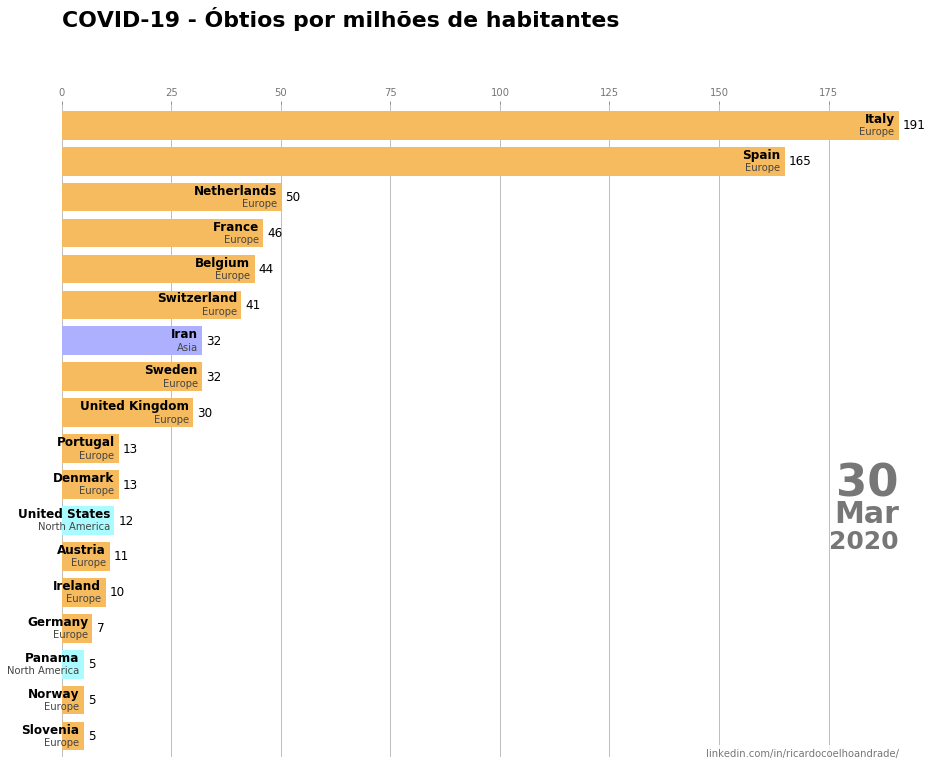

In [332]:
fig, ax = plt.subplots(figsize=(15, 12))
animator = animation.FuncAnimation(fig, draw_barchart, frames=df.date.tail(265)  )
HTML(animator.to_jshtml())
# or use animator.to_html5_video() or animator.save() 
animator.save('corona.mp4') 

### xkcd-style

Turning your matplotlib plots into xkcd styled ones is pretty easy.
You can simply turn on `xkcd` sketch-style drawing mode with `plt.xkcd`.

In [ ]:
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(15, 12))
    draw_barchart(df.date.max())

# Step by step: Details

We'll now go over the ouput from sratch.

### Data transformations

We are interested to see top `value`s are a given `year`.
Using pandas transformations, we will get top `10` values.

In [ ]:
current_year = df.date.max()
dff = df[df['date'].eq(current_year)].sort_values(by='total_deaths_per_million', ascending=False).head(10)
dff

### Basic chart

Now, let's plot a basic bar chart. We start by creating a figure and an axes.
Then, we use `ax.barh(x, y)` to draw horizontal barchart.


In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
ax.barh(dff['location'], dff['total_deaths_per_million'])

### Color, Labels

Next, let's add group labels and colors based on groups.
We'll user `colors` and `group_lk` to add color to the bars.

In [ ]:
dff

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
dff = dff[::-1]
ax.barh(dff['location'], dff['total_deaths_per_million'], color=[colors[group_lk[x]] for x in dff['location']])
for i, (value, name) in enumerate(zip(dff['total_deaths_per_million'], dff['location'])):
    ax.text(value, i,     name,            ha='right')
    ax.text(value, i-.25, group_lk[name],  ha='right')
    ax.text(value, i,     value, ha='left')
    
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

### Polish Style

For convenience let's move our code to `draw_barchart` function.

We need to style following items:

- Text: font sizes, color, orientation 
- Format: comma separated values and axes tickers
- Axis: Move to top, color, add subtitle
- Grid: Add lines behind bars
- Remove box frame
- Add title, credit

In [ ]:
fig, ax = plt.subplots(figsize=(15, 12))
draw_barchart(df.date.max())

Matplotlib is a massive library, being able to adjust every aspect of a plot is powerful
but it can be complex / time-consuming for highly customized charts.
Atleast, for these bar chart races, it was fairly quick!